# Modeling Telco

# Importing libraries

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import wrangle as w
import explore as e
import modeling as m
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
# acquire the data
df = w.get_telco()
df =  w.wrangle_telco_encoded(df)

In [3]:
# split the data
train, validate, test = w.train_validate_test(df, 'churn')



In [4]:
# check correlation
abs(train.corr())

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,internet_service_type_fiber_optic,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
senior_citizen,1.000000,0.028089,0.206994,0.022277,0.005805,0.154137,0.216038,0.102329,0.139013,0.244305,...,0.056667,0.182607,0.104946,0.182607,0.121525,0.035609,0.118246,0.023020,0.165358,0.162835
partner,0.028089,1.000000,0.447724,0.382534,0.019544,0.009351,0.107835,0.324742,0.159401,0.001712,...,0.130027,0.010204,0.151795,0.010204,0.125581,0.093163,0.239835,0.090727,0.077309,0.105585
dependents,0.206994,0.447724,1.000000,0.160388,0.011252,0.109193,0.110436,0.065695,0.163208,0.161549,...,0.079742,0.140810,0.019449,0.140810,0.052278,0.057855,0.210880,0.057920,0.137791,0.055398
tenure,0.022277,0.382534,0.160388,1.000000,0.001655,0.012465,0.247130,0.823935,0.348330,0.022670,...,0.317959,0.042997,0.291208,0.042997,0.269309,0.202455,0.559881,0.225785,0.212851,0.242165
phone_service,0.005805,0.019544,0.011252,0.001655,1.000000,0.002292,0.240472,0.107560,0.011578,0.283323,...,0.095660,0.169315,0.016472,0.169315,0.030943,0.009751,0.006620,0.002996,0.004544,0.008524
paperless_billing,0.154137,0.009351,0.109193,0.012465,0.002292,1.000000,0.346382,0.158820,0.188077,0.317959,...,0.042216,0.329050,0.213209,0.329050,0.207658,0.044709,0.137293,0.004374,0.208999,0.199886
monthly_charges,0.216038,0.107835,0.110436,0.247130,0.240472,0.346382,1.000000,0.654277,0.188467,0.787106,...,0.332445,0.768142,0.639230,0.768142,0.635009,0.000447,0.069769,0.026555,0.262278,0.355673
total_charges,0.102329,0.324742,0.065695,0.823935,0.107560,0.158820,0.654277,1.000000,0.192130,0.368717,...,0.422944,0.380995,0.530493,0.380995,0.511135,0.168912,0.355656,0.178475,0.065219,0.291629
churn,0.139013,0.159401,0.163208,0.348330,0.011578,0.188077,0.188467,0.192130,1.000000,0.303352,...,0.153070,0.221720,0.056389,0.221720,0.063197,0.187877,0.291850,0.128428,0.301090,0.080974
internet_service_type_fiber_optic,0.244305,0.001712,0.161549,0.022670,0.283323,0.317959,0.787106,0.368717,0.303352,1.000000,...,0.028354,0.467746,0.338463,0.467746,0.333920,0.083265,0.205533,0.043340,0.328194,0.292566


In [5]:
x_train = train.drop(["churn", "customer_id"], axis=1)
y_train = train.churn
x_validate = validate.drop(["churn", "customer_id"], axis=1)
y_validate = validate.churn
x_test = test.drop(["churn", "customer_id"], axis=1)
y_test = test.churn

In [6]:
x_train

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,internet_service_type_fiber_optic,internet_service_type_dsl,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,0,0,1,26,0,1,39.95,1023.75,0,1,...,0,0,1,0,0,1,0,0,0,0
2479,0,1,0,47,1,0,26.90,1250.85,0,0,...,0,1,0,1,0,1,0,0,1,0
5889,0,0,0,1,1,1,50.45,50.45,0,1,...,0,0,0,0,0,0,0,0,0,1
6087,0,0,0,69,0,1,60.05,4176.70,0,1,...,1,0,1,0,1,0,1,0,0,0
785,0,0,0,51,1,0,87.55,4475.90,1,0,...,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,0,1,0,2,1,0,79.70,165.00,1,0,...,0,0,0,0,0,0,0,0,0,0
356,1,0,0,52,0,1,50.50,2566.30,0,1,...,1,0,1,0,0,0,0,0,1,0
1756,0,0,0,4,1,1,70.20,237.95,1,0,...,0,0,0,0,0,0,0,0,1,0
2127,0,0,0,35,1,0,55.25,1924.10,0,1,...,0,0,0,0,0,0,1,0,0,1


# Baseline Prediction
* 73% of the customers are not churning

In [7]:
y_train.value_counts(normalize=True)

0    0.734675
1    0.265325
Name: churn, dtype: float64

# Decision Tree



In [8]:
# fit the model
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [9]:
# evaluate the model
m.validate_model_test(clf, x_train, y_train, x_validate, y_validate)

------------------------------------
Model: DecisionTreeClassifier(max_depth=3, random_state=123)
Accuracy of model on training set: 0.787
[[2902  202]
 [ 698  423]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3104
           1       0.68      0.38      0.48      1121

    accuracy                           0.79      4225
   macro avg       0.74      0.66      0.68      4225
weighted avg       0.77      0.79      0.76      4225

------------------------------------
Model: DecisionTreeClassifier(max_depth=3, random_state=123)
Accuracy of model on validate set: 0.793
[[971  64]
 [228 146]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1035
           1       0.70      0.39      0.50       374

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409



## Takeaways
* The model performs better than the baseline
* Model performs at 78.7% accuracy on train and 79.3% accuracy on validate



# Logistic Regression

In [10]:
# fit the model
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [11]:
# evaluate the model
m.validate_model_test(logit, x_train, y_train, x_validate, y_validate)

------------------------------------
Model: LogisticRegression()
Accuracy of model on training set: 0.797
[[2764  340]
 [ 519  602]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3104
           1       0.64      0.54      0.58      1121

    accuracy                           0.80      4225
   macro avg       0.74      0.71      0.72      4225
weighted avg       0.79      0.80      0.79      4225

------------------------------------
Model: LogisticRegression()
Accuracy of model on validate set: 0.813
[[932 103]
 [161 213]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1035
           1       0.67      0.57      0.62       374

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



## Takeaways
* The model performs better than the baseline
* Model performs at 79.7% accuracy on train and 81.3% accuracy on validate


# Random Forest

In [12]:
# fit the model
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None,
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=5,
                            random_state=123)

In [13]:
# evaluate the model
m.validate_model_test(rf, x_train, y_train, x_validate, y_validate)

------------------------------------
Model: RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)
Accuracy of model on training set: 0.797
[[2893  211]
 [ 647  474]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3104
           1       0.69      0.42      0.52      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.68      0.70      4225
weighted avg       0.78      0.80      0.78      4225

------------------------------------
Model: RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)
Accuracy of model on validate set: 0.810
[[969  66]
 [202 172]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1035
           1       0.72      0.46      0.56       374

    accuracy                           0.81      1409
   macro avg       0.78      0.70      0.72      1409
weighted avg       0.80      0.81

## Takeaways
* The model performs better than the baseline
* Model performs at 79.7% accuracy on train and 81% accuracy on validate


# KNN

In [14]:
# fit the model
knn = KNeighborsClassifier(n_neighbors=10)


In [15]:
# evaluate the model
m.validate_model_test(knn, x_train, y_train, x_validate, y_validate)

------------------------------------
Model: KNeighborsClassifier(n_neighbors=10)
Accuracy of model on training set: 0.808
[[2940  164]
 [ 649  472]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3104
           1       0.74      0.42      0.54      1121

    accuracy                           0.81      4225
   macro avg       0.78      0.68      0.71      4225
weighted avg       0.80      0.81      0.79      4225

------------------------------------
Model: KNeighborsClassifier(n_neighbors=10)
Accuracy of model on validate set: 0.779
[[960  75]
 [236 138]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1035
           1       0.65      0.37      0.47       374

    accuracy                           0.78      1409
   macro avg       0.73      0.65      0.67      1409
weighted avg       0.76      0.78      0.76      1409



## Takeaways
* The model performs better than the baseline
* Model performs at 80.8% accuracy on train and 77.9% accuracy on validate
* Model seems to be overfitting


# Modeling Takeaways
* Logistic Regression is the best performing model
* All models perform better than the baseline


# Fine Tuning Logistic Regression Model


In [16]:
# fit the model
logit = LogisticRegression(penalty='l1', random_state=123, solver='liblinear')

In [17]:
# evaluate the model
m.validate_model_test(logit, x_train, y_train, x_validate, y_validate)

------------------------------------
Model: LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
Accuracy of model on training set: 0.800
[[2778  326]
 [ 518  603]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3104
           1       0.65      0.54      0.59      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.79      0.80      0.79      4225

------------------------------------
Model: LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
Accuracy of model on validate set: 0.815
[[933 102]
 [159 215]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1035
           1       0.68      0.57      0.62       374

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      

# Test the model on the test data

In [18]:
# fit the model
logit = LogisticRegression(penalty='l1', random_state=123, solver='liblinear')

In [19]:
m.test_model_test(logit, x_train, y_train, x_test, y_test)

------------------------------------
Model: LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
Accuracy of model on training set: 0.800
[[2778  326]
 [ 518  603]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3104
           1       0.65      0.54      0.59      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.79      0.80      0.79      4225

------------------------------------
Model: LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
Accuracy of model on test set: 0.818
[[932 103]
 [154 220]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1035
           1       0.68      0.59      0.63       374

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81

## Takeaways
* The model performed better on test than valadate and test
* Model performs at 80% accuracy on train and 81.5% accuracy on validate
* Model performed at an accuracy of 81.8% on test

# Export Predictions in csv file

In [20]:
# fit the model
logit = LogisticRegression(penalty='l1', random_state=123, solver='liblinear')

In [21]:
logit.fit(x_train, y_train)

LogisticRegression(penalty='l1', random_state=123, solver='liblinear')

# Visualize the model

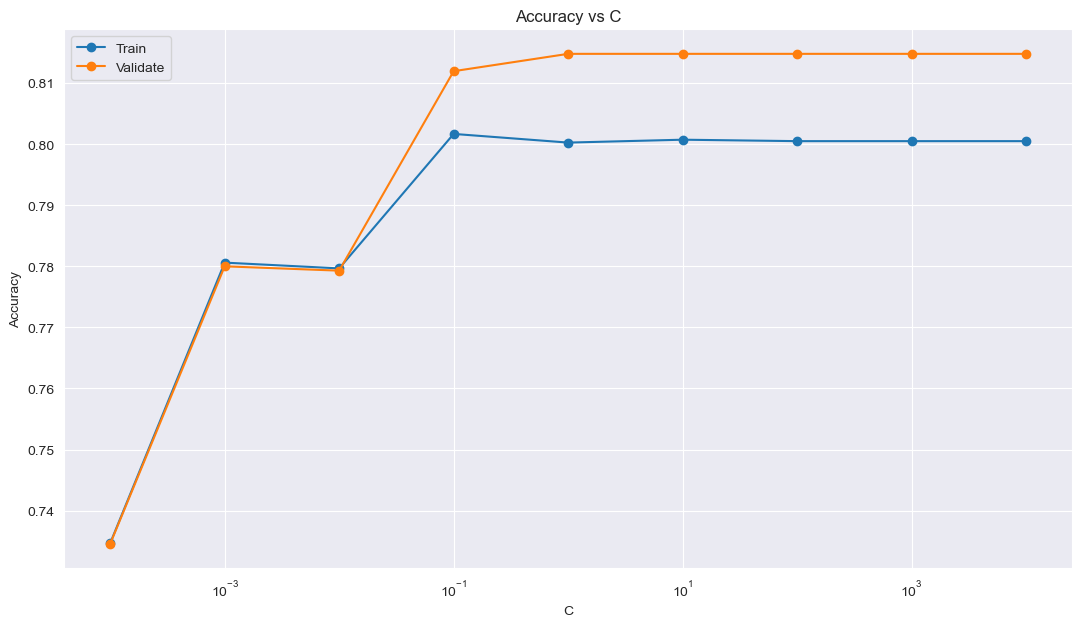

In [37]:
# visualize the model

def visualize_model():

    cvalue = [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]
    train_accuracy = []
    validate_accuracy = []
    for c in cvalue:
        logit = LogisticRegression(penalty='l1', C=c, random_state=123, solver='liblinear')
        logit.fit(x_train, y_train)
        train_accuracy.append(logit.score(x_train, y_train))
        validate_accuracy.append(logit.score(x_validate, y_validate))
    plt.figure(figsize=(13, 7))
    plt.plot(cvalue, train_accuracy, label='Train', marker='o')
    plt.plot(cvalue, validate_accuracy, label='Validate', marker='o')
    plt.xticks(cvalue)
    plt.xscale('log')
    plt.ylabel('Accuracy')
    plt.xlabel('C')
    plt.title('Accuracy vs C')
    plt.legend()

visualize_model()



In [40]:
# create a dataframe with customer_id , probability of churn, and prediction
prediction_df = pd.DataFrame({'customer_id': test.customer_id,
                              'probability_of_churn': logit.predict_proba(x_test)[:,1],
                              'prediction_of_churn': logit.predict(x_test)})
prediction_df

,customer_id,probability_of_churn,prediction_of_churn
3160,4531-AUZNK,0.122469,0
1577,2296-DKZFP,0.007984,0
6823,9692-TUSXH,0.595138,1
3615,5129-JLPIS,0.500050,1
882,1273-MTETI,0.781627,1
...,...,...,...
1097,1597-FZREH,0.443790,0
6441,9117-SHLZX,0.453097,0
5985,8441-SHIPE,0.004155,0
2452,3511-BFTJW,0.004152,0


In [41]:
# export the dataframe to csv
prediction_df.to_csv('predictions.csv')